In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

In [5]:
import os
print(os.getcwd())

c:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\notebook


In [6]:
# Load dataset
df_repayment = pd.read_csv(r"C:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\dataset\loan_repayment_data.csv")

In [7]:
# Strip whitespace from column names
df_repayment.columns = df_repayment.columns.str.strip()

# Feature selection
X_repayment = df_repayment.drop(columns=['Repayment Status'])
y_repayment = df_repayment['Repayment Status']

In [8]:
# Train-test split
X_train_repayment, X_test_repayment, y_train_repayment, y_test_repayment = train_test_split(X_repayment, y_repayment, test_size=0.2, random_state=42)

In [9]:
# Model training
model_repayment = RandomForestClassifier(n_estimators=100, random_state=42)
model_repayment.fit(X_train_repayment, y_train_repayment)

RandomForestClassifier(random_state=42)

In [10]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model training using Logistic Regression
model_logistic = LogisticRegression(random_state=42, max_iter=1000)
model_logistic.fit(X_train_repayment, y_train_repayment)

# Evaluate Logistic Regression model
logistic_score = model_logistic.score(X_test_repayment, y_test_repayment)
print(f"Logistic Regression Model Accuracy: {logistic_score:.2f}")

Logistic Regression Model Accuracy: 0.98


Random Forest Model AUC-ROC: 0.9736
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.94      0.98      0.96       161

    accuracy                           0.93       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.93      0.93      0.93       200

Logistic Regression Model AUC-ROC: 1.0000
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.98      1.00      0.99       161

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.98      0.98       200



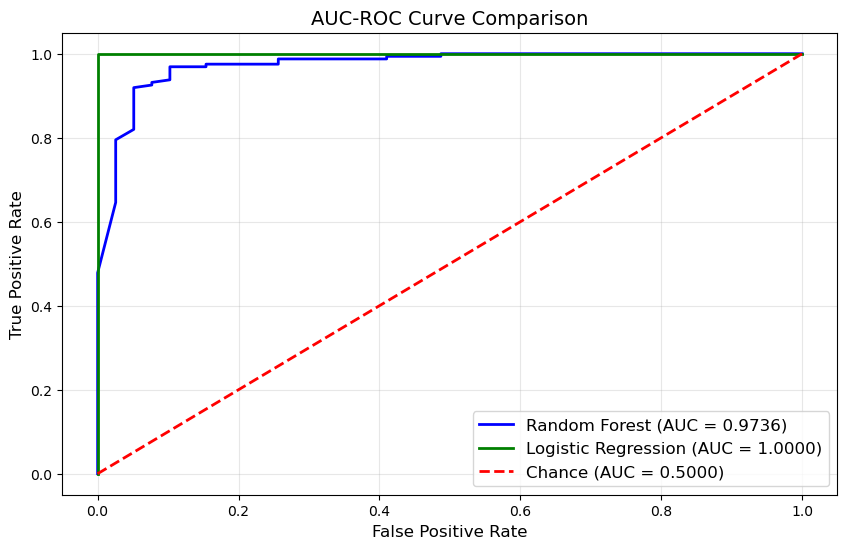

The Logistic Regression model performs better based on AUC-ROC.


In [11]:
from sklearn.metrics import roc_auc_score, classification_report

# Predictions for Random Forest
y_pred_rf = model_repayment.predict(X_test_repayment)
y_pred_proba_rf = model_repayment.predict_proba(X_test_repayment)[:, 1]  # Get probabilities for the positive class
auc_roc_rf = roc_auc_score(y_test_repayment, y_pred_proba_rf)
print(f"Random Forest Model AUC-ROC: {auc_roc_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test_repayment, y_pred_rf))

# Predictions for Logistic Regression
y_pred_logistic = model_logistic.predict(X_test_repayment)
y_pred_proba_logistic = model_logistic.predict_proba(X_test_repayment)[:, 1]  # Get probabilities for the positive class
auc_roc_logistic = roc_auc_score(y_test_repayment, y_pred_proba_logistic)
print(f"Logistic Regression Model AUC-ROC: {auc_roc_logistic:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test_repayment, y_pred_logistic))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot AUC-ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_repayment, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot AUC-ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_repayment, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, label=f"Logistic Regression (AUC = {roc_auc_logistic:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label="Chance (AUC = 0.5000)")

# Add labels, legend, and title
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("AUC-ROC Curve Comparison", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compare and choose the best model based on AUC-ROC
if auc_roc_rf > auc_roc_logistic:
    print("The Random Forest model performs better based on AUC-ROC.")
    best_model = model_repayment
else:
    print("The Logistic Regression model performs better based on AUC-ROC.")
    best_model = model_logistic

In [12]:
# Save the model
joblib.dump(best_model, r"c:\Users\afif.baharun\OneDrive - cgcmb\Machine Learning Repository\LoanDefaultAndRepaymentForecast\model\loan_repayment_model.pkl")

['c:\\Users\\afif.baharun\\OneDrive - cgcmb\\Machine Learning Repository\\LoanDefaultAndRepaymentForecast\\model\\loan_repayment_model.pkl']